# Mediterranean Sea

![header](../figures/logos_partenaires_DC_WOC-ESA.jpg)


***
**Authors:** Datlas <br>
**Copyright:** 2023 Datlas <br>
**License:** MIT

<br>

<br>


<div class="alert alert-block alert-success">
<h1><center> <u> Mediterranean results </u> </center></h1>  
</div>



<div class="alert alert-block alert-success"> 
 <h5><center> The notebook aims to evaluate the surface current for all products in the Mediterranean region.</center></h5> 
</div>


## <u> Compared products </u> 

<h3>
At 0m 
</h3> 
    <ul>  
        <li> <i>None</i></li> 
    </ul>  
<h3>
At 15m 
</h3> 
    <ul>  
        <li> GlobCurrent Geostrophic REP </li>   
        <li> WOC dADR-SR (dADR Med) </li>
        <li> WOC inertial global 15m </li>
        <li> NeurOST </li> 
        <li> OSCAR </li>
    </ul>  
 
  


<style>
     details > summary {
      list-style: none;
    }
    details > summary::-webkit-details-marker {
      display: none;
    }
</style>

In [1]:
from glob import glob
import numpy as np
import cartopy
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
import os
import sys 
sys.path.append('../')
import warnings
import datetime
warnings.filterwarnings("ignore") 

In [2]:
import velocity_metrics.spectrum.spectrum as spectrum
import velocity_metrics.lagrangian.drifters as drifters
import velocity_metrics.utils.constant as const 
import velocity_metrics.eulerian.eulerian_drifters as eulerian 
import velocity_metrics.lagrangian.cumulative_distance as sde
import velocity_metrics.fronts.compare_fronts_vel as compare_fronts_vel
import velocity_metrics.fronts.box_metrics as box_metrics

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [3]:
from src import utils

In [4]:

outputdir = '../results/'


<br>

<br>


<h2><u> 1. Spectrum </u></h2>


In [5]:
dir_spectrum = '../dc_data/DC_product_evaluation/spectrum/'


 
<details>
    <summary><h3> ▶️ At 15m</h3> </summary>
 

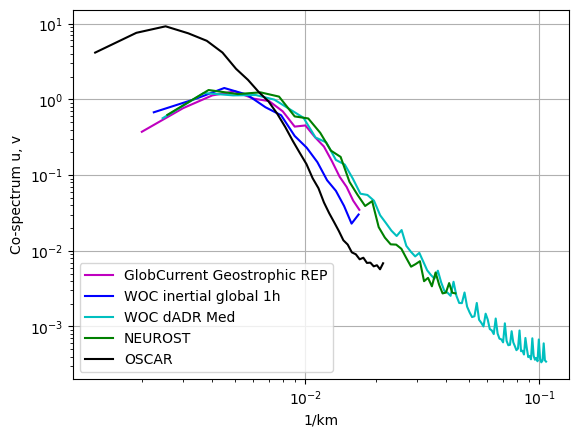

In [6]:
name_plot = 'Spectrum_Mediterranean_1.png'

list_spectrum_pickles = [dir_spectrum+'spectrum_008_047_region_Mediterranean_1.pyo', 
                         dir_spectrum+'spectrum_woc-l4-cureul-glob-1h_region_Mediterranean_1.pyo',
                         dir_spectrum+'spectrum_woc-l4-dadr-med-1d_region_Mediterranean_1.pyo',
                         dir_spectrum+'spectrum_neurost_region_Mediterranean_1.pyo',
                         dir_spectrum+'spectrum_oscar_region_T1_1.pyo']

_ = spectrum.plot(list_spectrum_pickles,
                      outfile=outputdir+name_plot,
                      list_color=['m','b','c','g','k'])


</details>
 

<br>

<br>

<h2><u> 2. Eulerian RMS </u></h2>



<details> 
    <summary><h3> ▶️ At 15m</h3></summary>
 

<br>

<h4>Norm errors</h4>

In [7]:
dir_eulerian = '../dc_data/DC_product_evaluation/eulerian_rms/'

In [8]:

list_dict = [{'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_008_047_15/Eulerian_RMS_008_047.pyo','name':'GlobCurrent Geostrophic'}, 
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-cureul-glob-1h_15/Eulerian_RMS_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 15m'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-dadr-med-1d_15/Eulerian_RMS_woc-l4-dadr-med-1d.pyo','name':'WOC dADR-SR'},
             {'type_stat':'Mean','path':dir_eulerian+'eulerian_rms_Mediterranean_neurost_15/Eulerian_RMS_neurost.pyo','name':'NeurOST'}] 

utils.DictTable(list_dict)  

Mean,Norm Quadratic Error (%),Norm Correlation,Norm Explained Variance (%),Norm RMSD,Number of Points
GlobCurrent Geostrophic,56.309,0.497,28.798,0.191,51875.000
WOC inertial global 15m,53.076,0.536,29.829,0.181,50604.000
WOC dADR-SR,55.884,0.499,36.801,0.190,50959.000
NeurOST,54.173,0.505,33.938,0.183,51823.000



<br>

<h4>Eastward errors</h4>



In [9]:
utils.DictTable(list_dict,['Eastward Quadratic Error (%)','Eastward Correlation','Eastward Explained Variance (%)','Eastward RMSD','Number of Points'])  
                           

Mean,Eastward Quadratic Error (%),Eastward Correlation,Eastward Explained Variance (%),Eastward RMSD,Number of Points
GlobCurrent Geostrophic,74.536,0.632,33.899,0.191,51875.000
WOC inertial global 15m,69.579,0.625,33.552,0.179,50604.000
WOC dADR-SR,76.981,0.613,44.332,0.198,50959.000
NeurOST,76.845,0.595,42.369,0.197,51823.000



<br>

<h4>Northward errors</h4>



In [10]:
utils.DictTable(list_dict,['Northward Quadratic Error (%)','Northward Correlation','Northward Explained Variance (%)','Northward RMSD','Number of Points'])  
                           

Mean,Northward Quadratic Error (%),Northward Correlation,Northward Explained Variance (%),Northward RMSD,Number of Points
GlobCurrent Geostrophic,80.777,0.633,39.746,0.179,51875.000
WOC inertial global 15m,76.659,0.655,37.399,0.171,50604.000
WOC dADR-SR,81.238,0.604,37.955,0.181,50959.000
NeurOST,80.824,0.625,36.793,0.179,51823.000


<br>

<h4>Standard deviation error</h4>

In [11]:

list_dict = [{'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_008_047_15/Eulerian_STD_008_047.pyo','name':'GlobCurrent Geostrophic'}, 
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-cureul-glob-1h_15/Eulerian_STD_woc-l4-cureul-glob-1h.pyo','name':'WOC inertial global 15m'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-dadr-med-1d_15/Eulerian_STD_woc-l4-dadr-med-1d.pyo','name':'WOC dADR-SR'},
             {'type_stat':'STD','path':dir_eulerian+'eulerian_rms_Mediterranean_neurost_15/Eulerian_STD_neurost.pyo','name':'NeurOST'}] 

utils.DictTable(list_dict,['Direction difference', 'Number of Points'])  

STD,Direction difference,Number of Points
GlobCurrent Geostrophic,41.196,51875.000
WOC inertial global 15m,41.756,50604.000
WOC dADR-SR,45.645,50959.000
NeurOST,43.640,51823.000


<br>

<h4>Binned plots</h4>

In [12]:

list_eulerian_pickles = [dir_eulerian+'eulerian_rms_Mediterranean_008_047_15/Eulerian_BINNED_008_047.pyo',
                         dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-cureul-glob-1h_15/Eulerian_BINNED_woc-l4-cureul-glob-1h.pyo',
                         dir_eulerian+'eulerian_rms_Mediterranean_woc-l4-dadr-med-1d_15/Eulerian_BINNED_woc-l4-dadr-med-1d.pyo',
                         dir_eulerian+'eulerian_rms_Mediterranean_neurost_15/Eulerian_BINNED_neurost.pyo']
list_names = ['GlobCurrents Total',
              'WOC inertial global 15m',
              'WOC dADR-SR',
              'NeurOST',]



<br><center><b>Results for diagnostic RMSD</b></center>

<b>GlobCurrents Total</b>

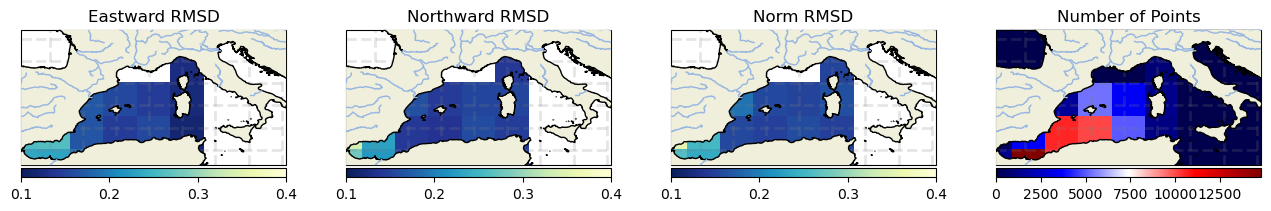

<b>WOC inertial global 15m</b>

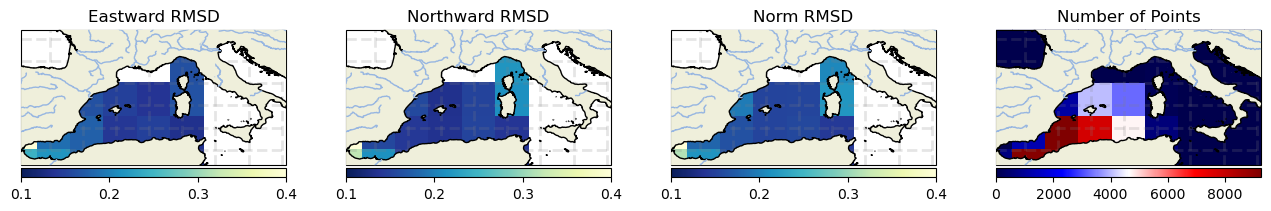

<b>WOC dADR-SR</b>

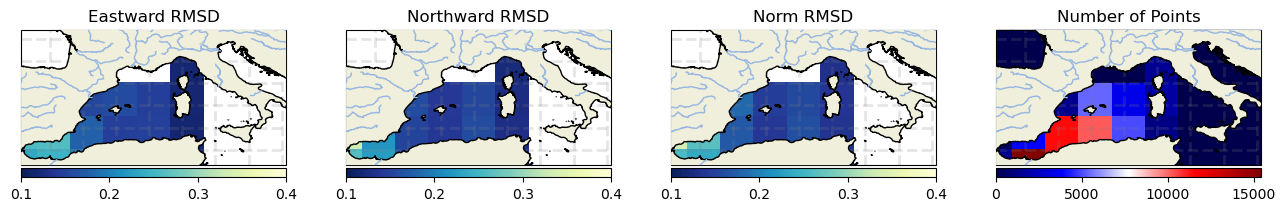

<b>NeurOST</b>

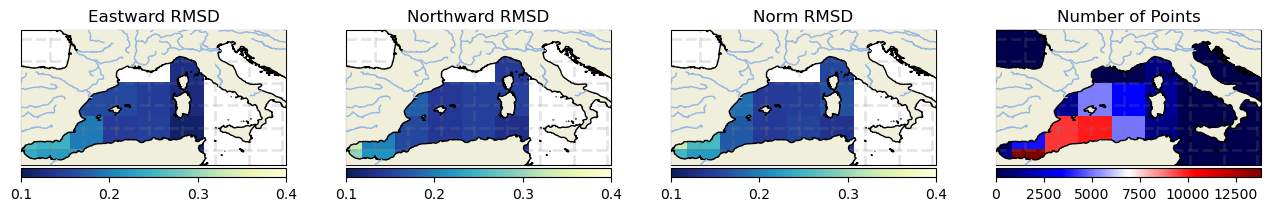


<br><center><b>Results for diagnostic Correlation</b></center>

<b>GlobCurrents Total</b>

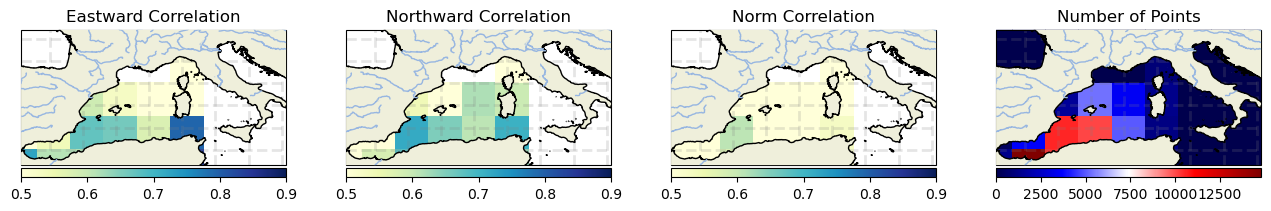

<b>WOC inertial global 15m</b>

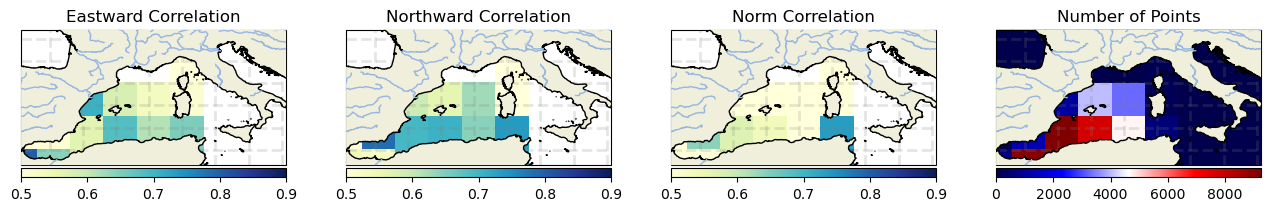

<b>WOC dADR-SR</b>

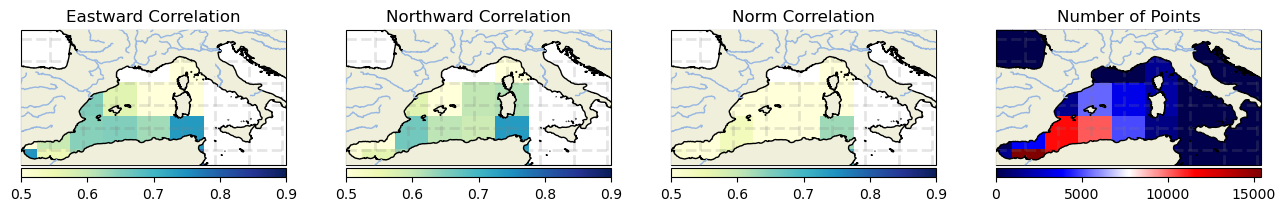

<b>NeurOST</b>

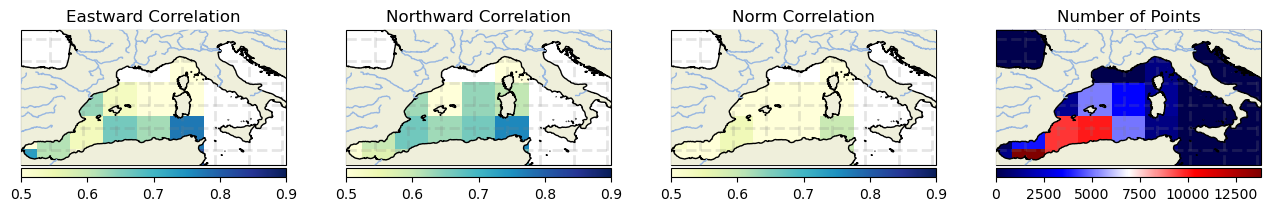


<br><center><b>Results for diagnostic Explained Variance (%)</b></center>

<b>GlobCurrents Total</b>

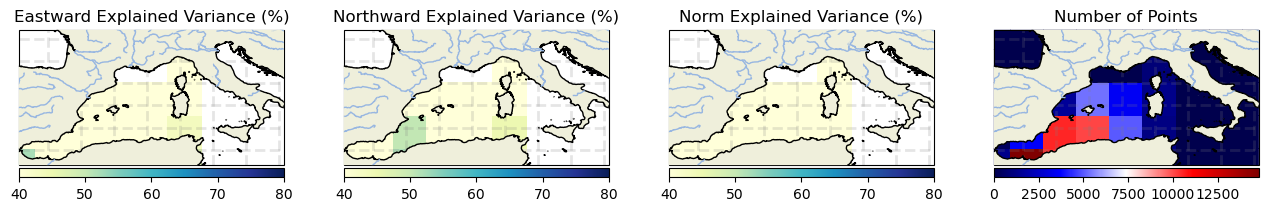

<b>WOC inertial global 15m</b>

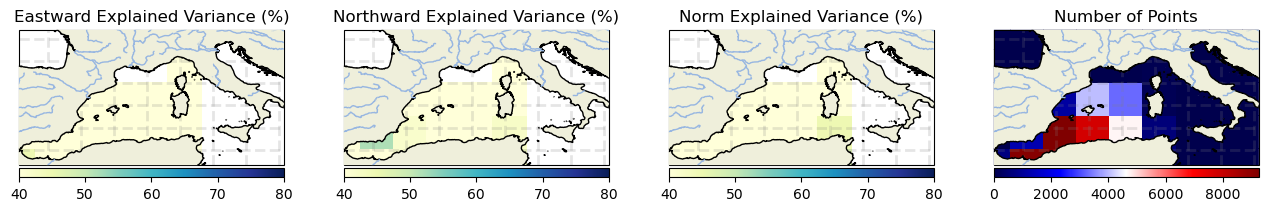

<b>WOC dADR-SR</b>

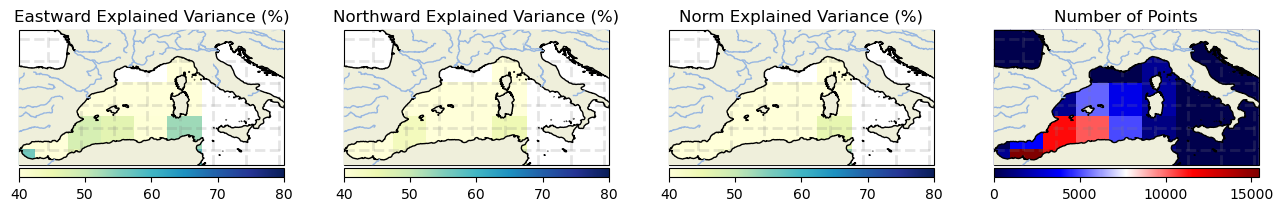

<b>NeurOST</b>

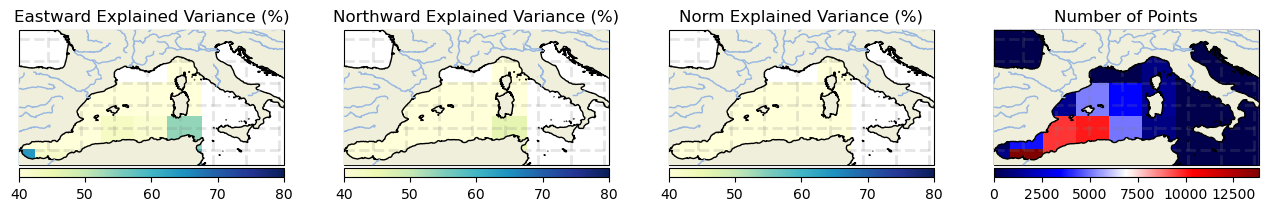


<br><center><b>Results for diagnostic Quadratic Error (%)</b></center>

<b>GlobCurrents Total</b>

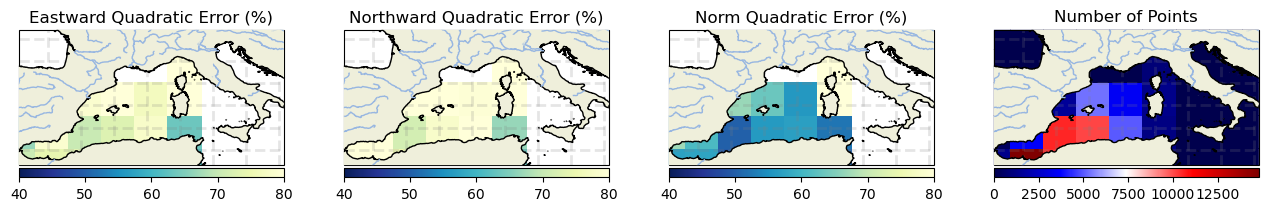

<b>WOC inertial global 15m</b>

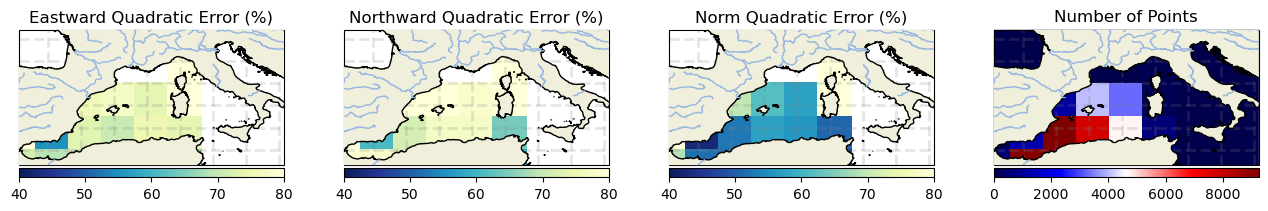

<b>WOC dADR-SR</b>

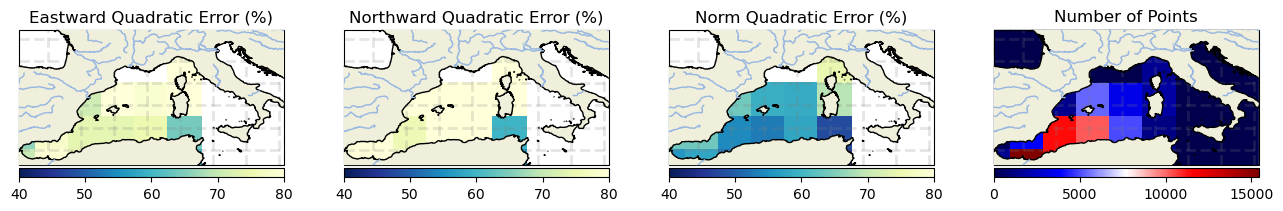

<b>NeurOST</b>

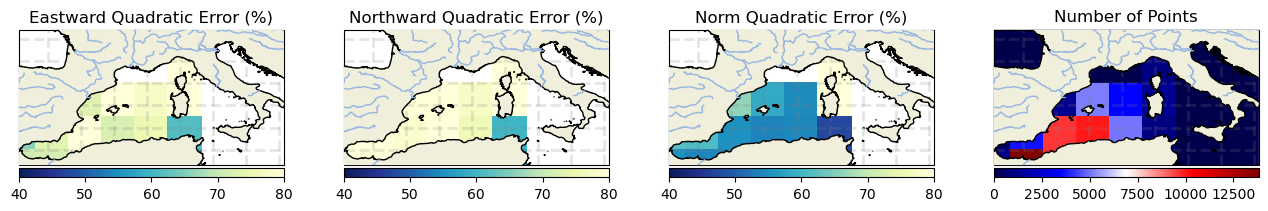

In [13]:


listvar = ('RMSD',  'Correlation', 'Explained Variance (%)', 'Quadratic Error (%)')

dic_p = {'RMSD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu_r'}, 
         'STD': {'vmin': 0.1, 'vmax': 0.4, 'cmap': 'YlGnBu'}, 
         'Correlation': {'vmin': 0.5, 'vmax': 0.9, 'cmap': 'YlGnBu'}, 
         'Explained Variance (%)': {'vmin': 40, 'vmax': 80, 'cmap': 'YlGnBu'}, 
         'Quadratic Error (%)': {'vmin': 40, 'vmax': 80, 'cmap': 'YlGnBu_r'}

        }

proj = cartopy.crs.PlateCarree()

ind = 0

var = listvar[ind]

for var in listvar:
    print('\n')
    display(Markdown(f'\n<br><center><b>Results for diagnostic {var}</b></center>')) 

    for eulerian_pickle, name in zip(list_eulerian_pickles, list_names):  
        display(Markdown(f'<b>{name}</b>'))
        fig = eulerian.plot_bin(eulerian_pickle, outputdir, var, #box=[-5, 11, 35, 43], 
                                vmin=dic_p[var]['vmin'],
                                vmax=dic_p[var]['vmax'],
                                cmap=dic_p[var]['cmap'],
                                proj=proj) 
        plt.show()

</details>


<br>

<br>

<h2><u> 3. Lagrangian Cumulative Distance</u></h2>


In [14]:
dir_sde = '../dc_data/DC_product_evaluation/cumulative_distance/'


<details>
    <summary><h3> ▶️ At 15m</h3></summary>

 

<Figure size 640x480 with 0 Axes>

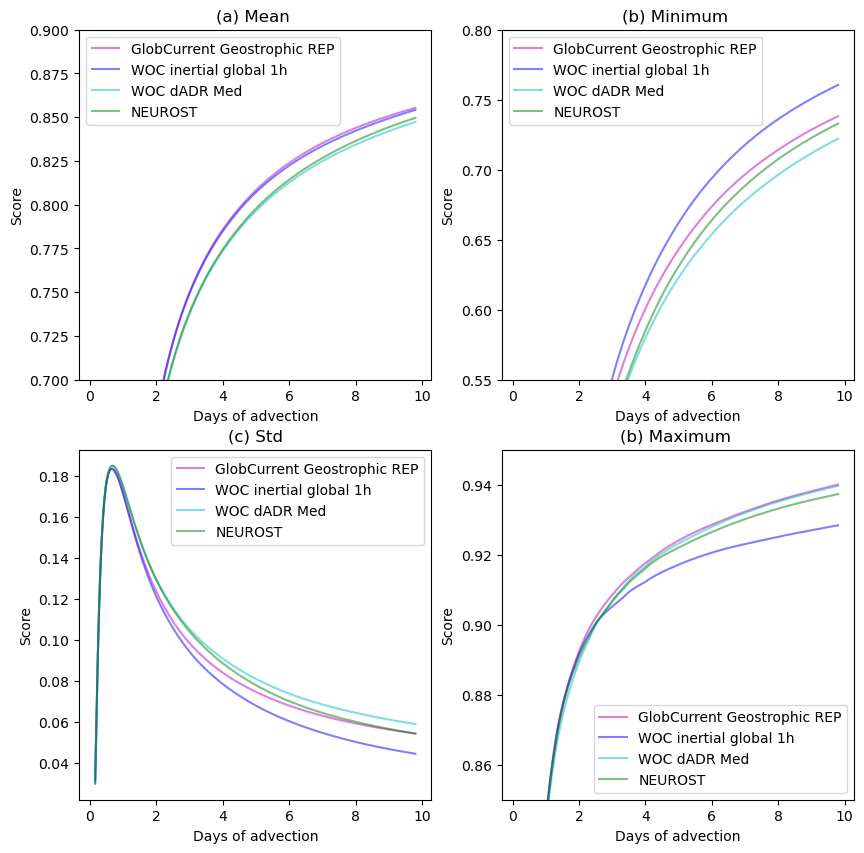

In [15]:
 

all_outputfilename = ['Mediterranean_008_047_15/Sde_008_047_15m.pyo.gz',
                      'Mediterranean_woc-l4-cureul-glob-1h_15/Sde_woc-l4-cureul-glob-1h_15m.pyo.gz',
                      'Mediterranean_woc-l4-dadr-med-1d_15/Sde_woc-l4-dadr-med-1d_00m.pyo.gz',
                      'Mediterranean_neurost_15/Sde_neurost_15m.pyo.gz',]

list_sde = [dir_sde + output_filename for output_filename in all_outputfilename]

outputfilename = 'SDE_region_Mediterranean_15m.png'

_ = sde.plot(list_sde, output_dir=outputdir, 
             output_filename=outputfilename,
             list_color=['m','b','c','g'],
             plot_range={'mean': (0.7, 0.9), 'max': (0.85, 0.95), 'min': (0.55, 0.8)})

</details> 

<br>

<br>

In [20]:
# Save results as a markdown file

! jupyter nbconvert --output-dir='../results'  nb_wocproducts_Mediterranean.ipynb --TagRemovePreprocessor.enabled=True --TagRemovePreprocessor.remove_cell_tags="['remove_cell', 'other_tag_to_remove']" --to markdown --no-input --no-prompt


[NbConvertApp] Converting notebook nb_wocproducts_Mediterranean.ipynb to markdown
[NbConvertApp] Support files will be in nb_wocproducts_Mediterranean_files/
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Mediterranean_files
[NbConvertApp] Making directory ../results/nb_wocproducts_Medi